# Task 2 - Object Detection

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import torchvision
from PIL import Image
from torch.optim import SGD

In [ ]:
yolo_model = YOLO("yolo11n.pt")

results_train = yolo_model.train(
    data="data/coco128.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    device=0,
    workers=2,
    verbose=True,
)
print("Training done. Weights at: runs/detect/train/weights/last.pt")

New https://pypi.org/project/ultralytics/8.3.223 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.221  Python-3.13.3 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Ultralytics 8.3.221  Python-3.13.3 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/coco128.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11

z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

AMP: checks passed 
train: Fast image access  (ping: 0.30.1 ms, read: 18.521.6 MB/s, size: 70.2 KB)
train: Fast image access  (ping: 0.30.1 ms, read: 18.521.6 MB/s, size: 70.2 KB)
train: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\train2017.cache... 110 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 112/112 94.6Kit/s 0.0s
train: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\train2017.cache... 110 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 112/112 94.6Kit/s 0.0s
val: Fast image access  (ping: 0.30.1 ms, read: 126.446.3 MB/s, size: 54.2 KB)
val: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\val2017.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 5.2Mit/s 0.0sval: Fast image access  (ping: 0.30.1 ms, read: 126.446.3 MB/s, size: 54.2 KB)
val: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\val2017.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 13.2Kit/s 0.0s
val: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\val2017.cache... 16 ima

z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       1/10      13.7G      1.163      1.269      1.214        144        640: 100% ━━━━━━━━━━━━ 7/7 0.5it/s 12.9s0.5ss

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.5it/s 2.1s
                   all         16         84      0.786      0.678      0.787       0.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.5it/s 2.1s
                   all         16         84      0.786      0.678      0.787       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       2/10      5.99G      1.123      1.178      1.184        109        640: 100% ━━━━━━━━━━━━ 7/7 2.8it/s 2.5s0.4s
       2/10      5.99G      1.123      1.178      1.184        109        640: 100% ━━━━━━━━━━━━ 7/7 2.8it/s 2.5s0.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.9it/s 0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.9it/s 0.2s
                   all         16         84      0.784      0.678      0.769      0.616
                   all         16         84      0.784      0.678      0.769      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       3/10      5.99G      1.128      1.178      1.166        101        640: 100% ━━━━━━━━━━━━ 7/7 4.7it/s 1.5s0.2s
       3/10      5.99G      1.128      1.178      1.166        101        640: 100% ━━━━━━━━━━━━ 7/7 4.7it/s 1.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.3it/s 0.1s
                   all         16         84       0.73       0.68      0.768      0.614
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.3it/s 0.1s
                   all         16         84       0.73       0.68      0.768      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/10      5.99G      1.169      1.153      1.157        117        640: 0% ──────────── 0/7  0.2s

z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       4/10      5.99G      1.149       1.14      1.169        101        640: 100% ━━━━━━━━━━━━ 7/7 5.3it/s 1.3s0.2s
       4/10      5.99G      1.149       1.14      1.169        101        640: 100% ━━━━━━━━━━━━ 7/7 5.3it/s 1.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all         16         84      0.725      0.683      0.754      0.607
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all         16         84      0.725      0.683      0.754      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       5/10      6.01G      1.069      1.128      1.165        160        640: 100% ━━━━━━━━━━━━ 7/7 4.6it/s 1.5s0.2s
       5/10      6.01G      1.069      1.128      1.165        160        640: 100% ━━━━━━━━━━━━ 7/7 4.6it/s 1.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all         16         84      0.675      0.683      0.784      0.605
                   all         16         84      0.675      0.683      0.784      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/10      5.98G     0.7971     0.8423      1.072         70        640: 0% ──────────── 0/7  0.2s

z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       6/10      5.99G      1.125      1.075      1.164        142        640: 100% ━━━━━━━━━━━━ 7/7 4.1it/s 1.7s0.3s
       6/10      5.99G      1.125      1.075      1.164        142        640: 100% ━━━━━━━━━━━━ 7/7 4.1it/s 1.7s0.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.3it/s 0.2s
                   all         16         84      0.657      0.689      0.779      0.604
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.3it/s 0.2s
                   all         16         84      0.657      0.689      0.779      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       7/10      5.99G       1.08      1.061      1.141         83        640: 100% ━━━━━━━━━━━━ 7/7 4.7it/s 1.5s0.2s
       7/10      5.99G       1.08      1.061      1.141         83        640: 100% ━━━━━━━━━━━━ 7/7 4.7it/s 1.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all         16         84      0.799      0.611      0.751      0.618
                   all         16         84      0.799      0.611      0.751      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/10      5.99G      1.104      1.035      1.099        173        640: 0% ──────────── 0/7  0.2s

z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       8/10      5.99G      1.098      1.064      1.155        138        640: 100% ━━━━━━━━━━━━ 7/7 5.4it/s 1.3s0.2s
       8/10      5.99G      1.098      1.064      1.155        138        640: 100% ━━━━━━━━━━━━ 7/7 5.4it/s 1.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.9it/s 0.1s
                   all         16         84      0.695      0.693      0.752      0.613
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.9it/s 0.1s
                   all         16         84      0.695      0.693      0.752      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/10      6.01G       1.16      1.054      1.133        131        640: 0% ──────────── 0/7  0.2s

z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

       9/10      6.01G      1.091       1.03       1.13        100        640: 100% ━━━━━━━━━━━━ 7/7 5.1it/s 1.4s0.2s
       9/10      6.01G      1.091       1.03       1.13        100        640: 100% ━━━━━━━━━━━━ 7/7 5.1it/s 1.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all         16         84      0.698      0.692      0.751      0.615
                   all         16         84      0.698      0.692      0.751      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/10      5.98G     0.9982      0.881       1.15         88        640: 0% ──────────── 0/7  0.2s

z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
z:\AT82.08-CV-A2\.venv\Lib\site-packages\ultralytics\nn\modules\block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`,

      10/10      5.99G      1.062       1.03      1.134         87        640: 100% ━━━━━━━━━━━━ 7/7 5.3it/s 1.3s0.2s
      10/10      5.99G      1.062       1.03      1.134         87        640: 100% ━━━━━━━━━━━━ 7/7 5.3it/s 1.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.9it/s 0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.9it/s 0.1s
                   all         16         84      0.699      0.692       0.75      0.617
                   all         16         84      0.699      0.692       0.75      0.617

10 epochs completed in 0.012 hours.

10 epochs completed in 0.012 hours.
Optimizer stripped from Z:\AT82.08-CV-A2\runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from Z:\AT82.08-CV-A2\runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from Z:\AT82.08-CV-A2\runs\detect\train2\weights\best.pt, 5.5MB

Validating Z

In [ ]:
metrics = yolo_model.val(data="data/coco128.yaml", imgsz=640)
print(metrics)

Ultralytics 8.3.221  Python-3.13.3 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access  (ping: 0.30.1 ms, read: 135.354.4 MB/s, size: 55.5 KB)
val: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\val2017.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 3.4Mit/s 0.0sval: Fast image access  (ping: 0.30.1 ms, read: 135.354.4 MB/s, size: 55.5 KB)
val: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\val2017.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 12.8Kit/s 0.0s
val: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\val2017.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 12.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.2it/s 5.4s
                 Class   

In [60]:
pred = model.predict(source="data/coco128/images/val2017", save=True, imgsz=640, max_det=100, conf=0.25)
print("Saved predictions to:", pred[0].save_dir if pred else "(none)")



image 1/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000590.jpg: 640x544 1 sink, 30.5ms
image 1/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000590.jpg: 640x544 1 sink, 30.5ms
image 2/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000595.jpg: 480x640 1 tv, 31.0ms
image 2/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000595.jpg: 480x640 1 tv, 31.0ms
image 3/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000597.jpg: 256x640 9 elephants, 27.1ms
image 3/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000597.jpg: 256x640 9 elephants, 27.1ms
image 4/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000599.jpg: 416x640 1 cat, 1 couch, 1 potted plant, 2 remotes, 18.1ms
image 4/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000599.jpg: 416x640 1 cat, 1 couch, 1 potted plant, 2 remotes, 18.1ms
image 5/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000605.jpg: 480x640 2 cups, 1 spoon, 2 bowls, 2 cakes, 1 dining table, 25.1ms
image 5

In [61]:
labels = [
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "dining table",
    "toilet",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

In [3]:
%matplotlib inline

In [62]:
def load_predict_image(image_path, model):
    img = cv2.imread(image_path)
    result = model.predict(img)
    for box, label in zip(result[0].boxes.xyxy.cpu().numpy(), result[0].boxes.cls.cpu().numpy()):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"ID:{labels[int(label)]}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img

In [63]:
def random_predict_n_images_from_folder(folder_path, n, model):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    selected_files = np.random.choice(image_files, n, replace=False)
    for file_name in selected_files:
        image_path = os.path.join(folder_path, file_name)
        img_with_detections = load_predict_image(image_path, model)
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()


0: 480x640 1 tv, 24.6ms
Speed: 2.1ms preprocess, 24.6ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 1 tv, 24.6ms
Speed: 2.1ms preprocess, 24.6ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)


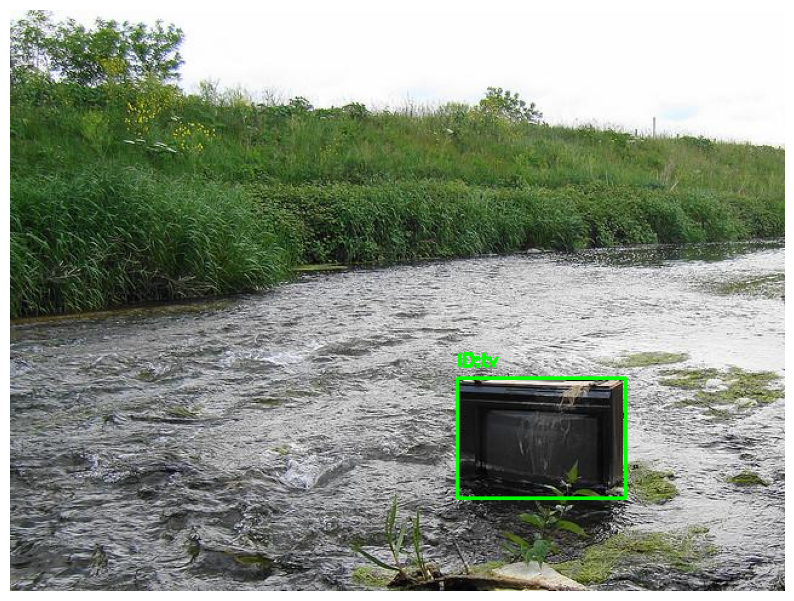


0: 640x480 2 pizzas, 1 oven, 1 refrigerator, 19.5ms
Speed: 1.3ms preprocess, 19.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
0: 640x480 2 pizzas, 1 oven, 1 refrigerator, 19.5ms
Speed: 1.3ms preprocess, 19.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


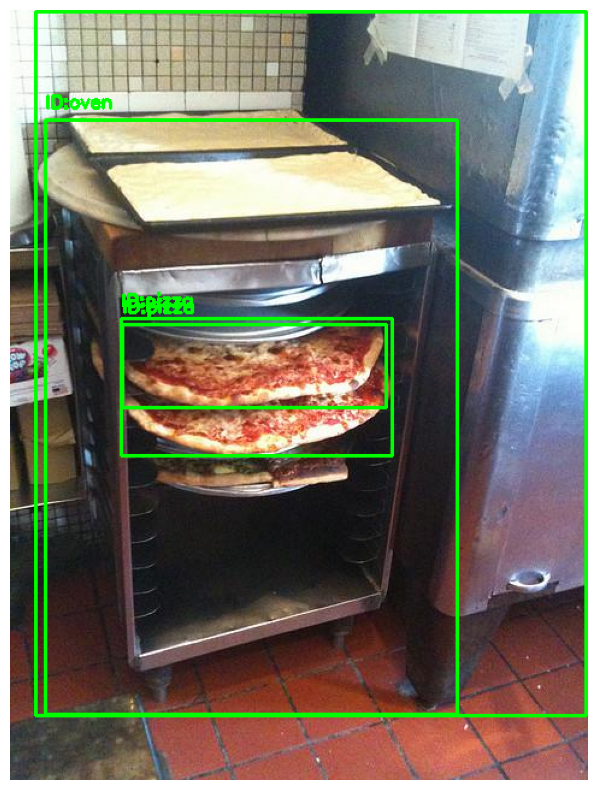


0: 448x640 4 persons, 1 frisbee, 18.3ms
Speed: 1.2ms preprocess, 18.3ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)
0: 448x640 4 persons, 1 frisbee, 18.3ms
Speed: 1.2ms preprocess, 18.3ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


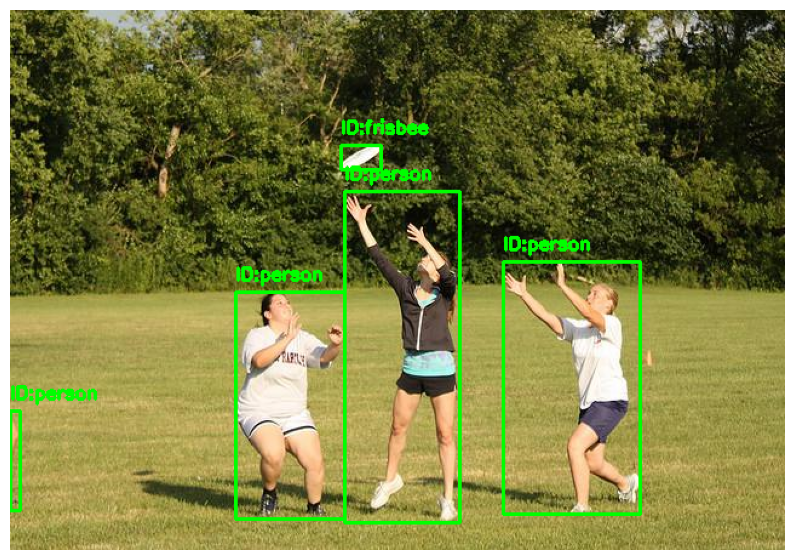


0: 480x640 2 clocks, 18.4ms
Speed: 1.6ms preprocess, 18.4ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 2 clocks, 18.4ms
Speed: 1.6ms preprocess, 18.4ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


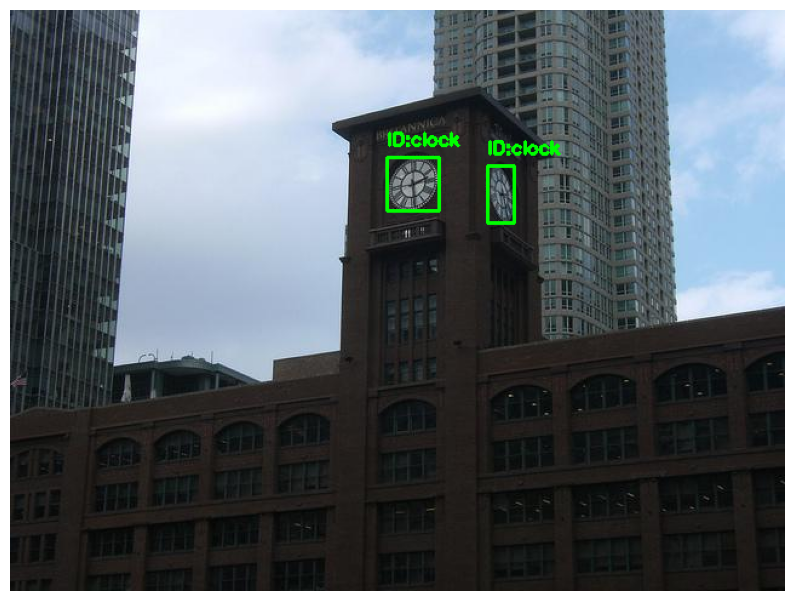


0: 448x640 1 person, 1 bus, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
0: 448x640 1 person, 1 bus, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


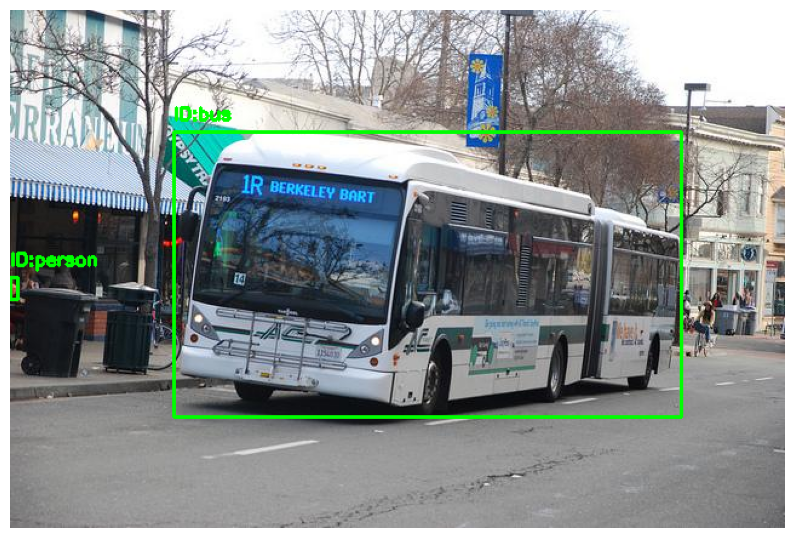

In [64]:
random_predict_n_images_from_folder("data/coco128/images/val2017", 5, model)

In [27]:
from torch.utils.data import Dataset


class YOLODataset(Dataset):
    def __init__(self, img_dir, label_dir, transforms=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transforms = transforms
        self.imgs = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, os.path.splitext(img_name)[0] + ".txt")

        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        boxes = []
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue  # skip broken lines
                    c, x, y, bw, bh = map(float, parts)
                    xmin = (x - bw / 2) * w
                    xmax = (x + bw / 2) * w
                    ymin = (y - bh / 2) * h
                    ymax = (y + bh / 2) * h
                    boxes.append([xmin, ymin, xmax, ymax])
                    labels.append(int(c) + 1)  # add 1 because class 0 = background

        if len(boxes) == 0:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
        else:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)

        # always return something; empty box tensor is fine
        target = {"boxes": boxes, "labels": labels}

        if self.transforms:
            img = self.transforms(img)

        return img, target


In [28]:
train_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
val_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = YOLODataset(
    img_dir="data/coco128/images/train2017", label_dir="data/coco128/labels/train2017", transforms=train_transforms
)

val_dataset = YOLODataset(
    img_dir="data/coco128/images/val2017", label_dir="data/coco128/labels/val2017", transforms=val_transforms
)


def collate_fn(batch):
    return tuple(zip(*batch))


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)


In [29]:
for images, targets in train_loader:
    print("Batch of images shape:", images)
    print("Batch of targets:", targets)
    break

Batch of images shape: (tensor([[[0.4902, 0.4941, 0.4941,  ..., 0.2706, 0.2588, 0.2510],
         [0.4980, 0.4980, 0.4941,  ..., 0.2667, 0.2627, 0.2588],
         [0.5059, 0.5059, 0.4980,  ..., 0.2549, 0.2471, 0.2431],
         ...,
         [0.4431, 0.3765, 0.3882,  ..., 0.0745, 0.0745, 0.0745],
         [0.4314, 0.4000, 0.4275,  ..., 0.0784, 0.0784, 0.0784],
         [0.4235, 0.4353, 0.4745,  ..., 0.0824, 0.0824, 0.0824]],

        [[0.3922, 0.3961, 0.3961,  ..., 0.2706, 0.2588, 0.2510],
         [0.4000, 0.4000, 0.3961,  ..., 0.2667, 0.2627, 0.2588],
         [0.4078, 0.4078, 0.4000,  ..., 0.2549, 0.2471, 0.2431],
         ...,
         [0.3843, 0.3176, 0.3294,  ..., 0.0745, 0.0745, 0.0745],
         [0.3725, 0.3412, 0.3686,  ..., 0.0784, 0.0784, 0.0784],
         [0.3529, 0.3647, 0.4039,  ..., 0.0824, 0.0824, 0.0824]],

        [[0.1412, 0.1451, 0.1451,  ..., 0.1608, 0.1490, 0.1412],
         [0.1490, 0.1490, 0.1451,  ..., 0.1569, 0.1529, 0.1490],
         [0.1490, 0.1490, 0.1412, 

In [30]:
for images, targets in val_loader:
    print("Batch of images shape:", images)
    print("Batch of targets:", targets)
    break

Batch of images shape: (tensor([[[0.6392, 0.6392, 0.6314,  ..., 0.7647, 0.7647, 0.7569],
         [0.6706, 0.6706, 0.6706,  ..., 0.7686, 0.7647, 0.7843],
         [0.6157, 0.6235, 0.6275,  ..., 0.7725, 0.7686, 0.7569],
         ...,
         [0.5373, 0.5294, 0.5137,  ..., 0.8000, 0.8000, 0.7922],
         [0.5176, 0.5255, 0.5373,  ..., 0.8000, 0.8000, 0.8000],
         [0.5725, 0.5843, 0.6078,  ..., 0.8000, 0.8000, 0.8039]],

        [[0.6431, 0.6431, 0.6353,  ..., 0.7529, 0.7529, 0.7451],
         [0.6745, 0.6745, 0.6745,  ..., 0.7569, 0.7529, 0.7725],
         [0.6196, 0.6275, 0.6314,  ..., 0.7608, 0.7569, 0.7451],
         ...,
         [0.5412, 0.5333, 0.5176,  ..., 0.8078, 0.8078, 0.8000],
         [0.5216, 0.5294, 0.5412,  ..., 0.8078, 0.8078, 0.8078],
         [0.5765, 0.5882, 0.6118,  ..., 0.8078, 0.8078, 0.8118]],

        [[0.6196, 0.6196, 0.6118,  ..., 0.7255, 0.7255, 0.7176],
         [0.6510, 0.6510, 0.6510,  ..., 0.7294, 0.7255, 0.7451],
         [0.5961, 0.6039, 0.6078, 

In [44]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = fasterrcnn_resnet50_fpn(weights="COCO_V1")

# Replace the classifier head
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 81)


In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for imgs, targets in train_loader:
        imgs = [img.to(device) for img in imgs]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(imgs, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        total_loss += losses.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")


Epoch 1/5, Loss: 1.7928
Epoch 2/5, Loss: 1.2473
Epoch 2/5, Loss: 1.2473
Epoch 3/5, Loss: 1.1018
Epoch 3/5, Loss: 1.1018
Epoch 4/5, Loss: 1.0674
Epoch 4/5, Loss: 1.0674
Epoch 5/5, Loss: 0.9786
Epoch 5/5, Loss: 0.9786


In [46]:
torch.save(model.state_dict(), "task2_models/fasterrcnn_coco128.pth")

In [67]:
model = fasterrcnn_resnet50_fpn(weights=None)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 81)
model.load_state_dict(torch.load("task2_models/fasterrcnn_coco128.pth"))
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [68]:
model.to(device)
model.eval()
with torch.no_grad():
    for imgs, _ in val_loader:
        imgs = [img.to(device) for img in imgs]
        outputs = model(imgs)

        for i, output in enumerate(outputs):
            keep = output["scores"] > 0.05
            print(f"Image {i + 1}:")
            print("Predicted boxes:", output["boxes"][keep].cpu().numpy())
            print("Predicted labels:", output["labels"][keep].cpu().numpy())
            print("Predicted scores:", output["scores"][keep].cpu().numpy())
        break


Image 1:
Predicted boxes: [[ 76.42983   295.7643    156.04326   317.49414  ]
 [111.815155  258.95142   128.12804   285.73212  ]
 [  7.2146273 309.98007    75.96109   334.6264   ]]
Predicted labels: [ 3  1 57]
Predicted scores: [0.07870788 0.07041872 0.05108789]
Image 2:
Predicted boxes: [[367.31406 290.52225 489.8415  425.5782 ]
 [312.95758 313.54547 506.31738 408.02524]
 [391.8392  303.43262 474.17825 406.88898]
 [360.52048 296.33276 517.7176  413.332  ]
 [384.09674 308.3045  491.39423 411.29102]
 [342.83362 299.97058 502.04312 404.03873]]
Predicted labels: [ 3  3 42 57 21 42]
Predicted scores: [0.0762305  0.06915548 0.06195771 0.06002545 0.05413119 0.05016195]
Image 3:
Predicted boxes: [[385.45874   148.60075   440.775     189.86818  ]
 [342.77515   164.10327   374.386     190.11023  ]
 [190.6249    135.1585    261.56454   193.54083  ]
 [137.61151   154.25858   196.50629   186.34827  ]
 [137.83382   148.24524   200.68668   192.93736  ]
 [472.1655    147.88031   531.78955   194.44623 

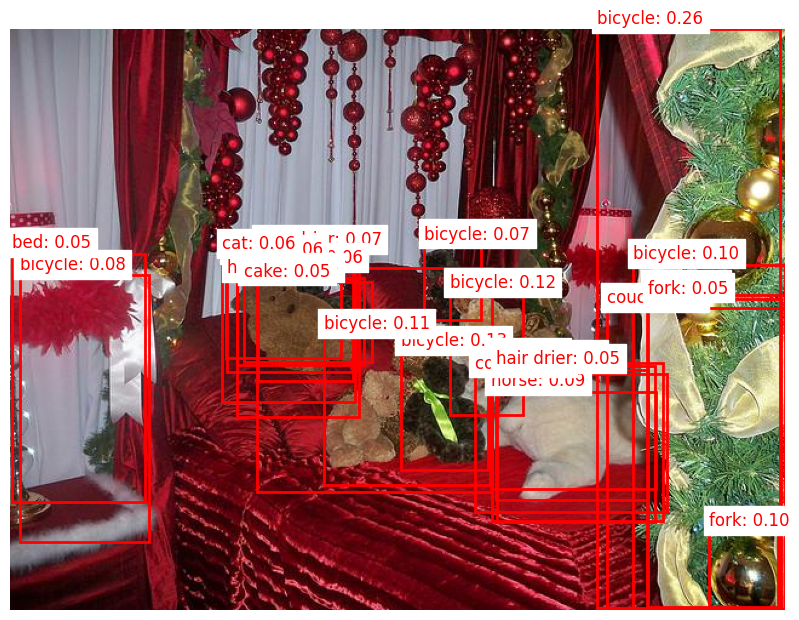

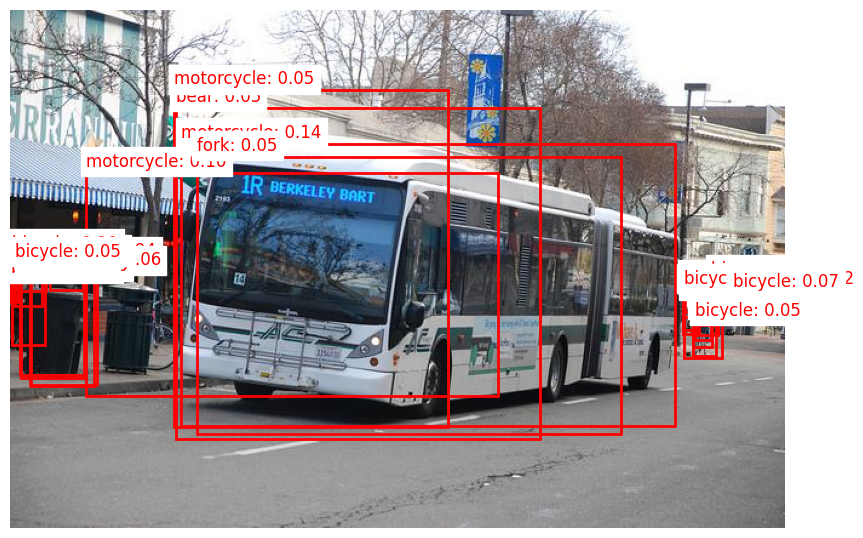

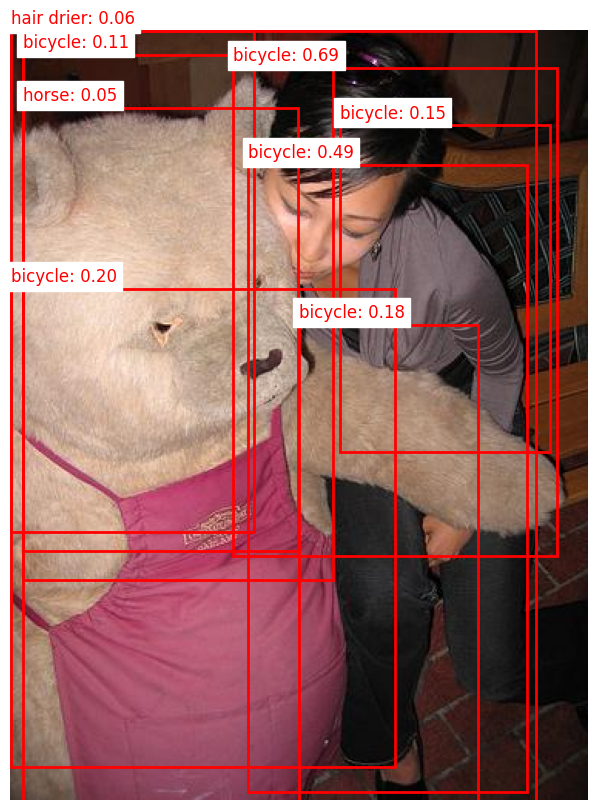

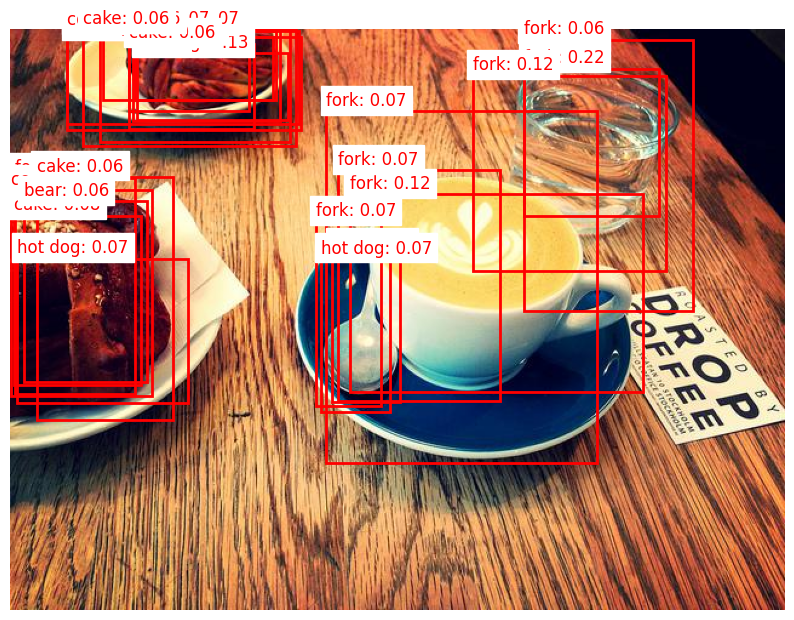

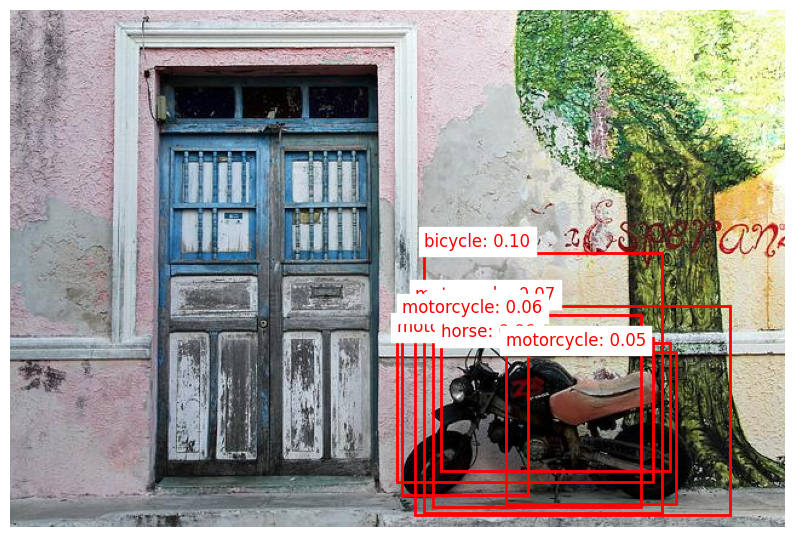

In [69]:
# Predict and plot a single image with bounding boxes
import matplotlib.patches as patches


def plot_image_with_boxes(img, boxes, labels, scores, label_names=None, score_thresh=0.05):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img.permute(1, 2, 0).cpu().numpy())
    for box, label, score in zip(boxes, labels, scores):
        if score < score_thresh:
            continue
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="r", facecolor="none")
        ax.add_patch(rect)
        label_str = str(label)
        if label_names and label < len(label_names):
            label_str = label_names[label]
        ax.text(x1, y1 - 5, f"{label_str}: {score:.2f}", color="red", fontsize=12, backgroundcolor="white")
    plt.axis("off")
    plt.show()


# Randomly select 5 images from val_dataset and plot predictions
num_images = 5
indices = np.random.choice(len(val_dataset), num_images, replace=False)
model.eval()
with torch.no_grad():
    for idx in indices:
        img, _ = val_dataset[idx]
        output = model([img.to(device)])
        boxes = output[0]["boxes"].cpu().numpy()
        labels_pred = output[0]["labels"].cpu().numpy()
        scores = output[0]["scores"].cpu().numpy()
        plot_image_with_boxes(img, boxes, labels_pred, scores, label_names=labels)

## Detection Accuracy, Inference Speed, and Model Size Comparison

This section measures detection accuracy (mAP), inference speed (FPS), and model size/memory usage for YOLO and Faster R-CNN on the same dataset.

In [66]:
yolo_model = YOLO("runs/detect/train2/weights/best.pt")

In [71]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision

# --- Detection Accuracy (YOLO) ---
yolo_metrics = yolo_model.val(data="data/coco128.yaml", imgsz=640)
print("YOLO mAP50-95:", yolo_metrics.box.map)


def compute_map_fasterrcnn(model, loader, device):
    model.eval()
    metric = MeanAveragePrecision(iou_type="bbox")
    with torch.no_grad():
        for imgs, targets in loader:
            imgs = [img.to(device) for img in imgs]
            outputs = model(imgs)
            outputs = [{k: v.cpu() for k, v in o.items()} for o in outputs]
            metric.update(outputs, targets)
    result = metric.compute()
    return result["map"]  # mAP averaged over IoU=0.5:0.95


fasterrcnn_map = compute_map_fasterrcnn(model, val_loader, device)
print("Faster R-CNN mAP (approx):", fasterrcnn_map)

Ultralytics 8.3.221  Python-3.13.3 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
val: Fast image access  (ping: 1.32.3 ms, read: 108.745.0 MB/s, size: 42.2 KB)
val: Scanning Z:\AT82.08-CV-A2\data\coco128\labels\val2017.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 15.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.2it/s 4.7s
                   all         16         84      0.788      0.678      0.764      0.621
                person          4         18      0.903      0.516      0.756      0.499
               bicycle          1          2          1          0       0.17     0.0852
                   car          1          1      0.606          1      0.995      0.697
            motorcycle          1          1      0.728          1      0.995      0.895
                   bus          1          1          1          1      0.995      0.895
                 bench

In [72]:
# --- Inference Speed (FPS) ---
import time


def measure_fps(model, loader, device, num_batches=10):
    model.eval()
    total_imgs = 0
    start = time.time()
    with torch.no_grad():
        for i, (imgs, _) in enumerate(loader):
            if i >= num_batches:
                break
            imgs = [img.to(device) for img in imgs]
            _ = model(imgs)
            total_imgs += len(imgs)
    elapsed = time.time() - start
    return total_imgs / elapsed if elapsed > 0 else 0


# YOLO FPS (using predict)
start = time.time()
pred = yolo_model.predict(source="data/coco128/images/val2017", imgsz=640, max_det=100, conf=0.25)
yolo_elapsed = time.time() - start
yolo_fps = len(pred) / yolo_elapsed if yolo_elapsed > 0 else 0
print(f"YOLO FPS: {yolo_fps:.2f}")

# Faster R-CNN FPS
fasterrcnn_fps = measure_fps(model, val_loader, device)
print(f"Faster R-CNN FPS: {fasterrcnn_fps:.2f}")

image 1/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000590.jpg: 640x544 1 sink, 45.2ms
image 2/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000595.jpg: 480x640 1 tv, 52.5ms
image 3/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000597.jpg: 256x640 9 elephants, 33.6ms
image 4/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000599.jpg: 416x640 1 cat, 1 couch, 1 potted plant, 2 remotes, 33.5ms
image 5/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000605.jpg: 480x640 2 cups, 1 spoon, 2 bowls, 2 cakes, 1 dining table, 18.3ms
image 6/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000612.jpg: 480x640 1 couch, 1 bed, 1 vase, 3 teddy bears, 16.5ms
image 7/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000620.jpg: 640x480 2 pizzas, 1 oven, 1 refrigerator, 34.2ms
image 8/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000623.jpg: 640x480 1 person, 2 teddy bears, 18.8ms
image 9/16 z:\AT82.08-CV-A2\data\coco128\images\val2017\000000000625.

In [76]:
# YOLO model size
yolo_weights_path = "runs/detect/train/weights/best.pt"
if os.path.exists(yolo_weights_path):
    yolo_size = os.path.getsize(yolo_weights_path) / (1024 * 1024)
    print(f"YOLO model size: {yolo_size:.2f} MB")
else:
    print("YOLO weights not found.")

# Faster R-CNN model size
fasterrcnn_weights_path = "task2_models/fasterrcnn_coco128.pth"
if os.path.exists(fasterrcnn_weights_path):
    fasterrcnn_size = os.path.getsize(fasterrcnn_weights_path) / (1024 * 1024)
    print(f"Faster R-CNN model size: {fasterrcnn_size:.2f} MB")
else:
    print("Faster R-CNN weights not found.")


YOLO model size: 5.28 MB
Faster R-CNN model size: 159.60 MB


### Results Summary

| Metric                        | YOLO         | Faster R-CNN    |
|-------------------------------|--------------|-----------------|
| Detection Accuracy (mAP50-95) | 0.62         | 0.06   |
| Inference Speed (FPS)         | 22.41         | 15.85            |
| Model Size (MB)               | 5.28 MB    | 159.60 MB      |
| Memory Usage (MB)             | Very low   | Very high (see screenshot below)      |

- YOLO is much better in every aspect. It trains and infers faster, has a smaller model size, uses less memory, and achieves higher detection accuracy (mAP).
- Faster R-CNN is really resource-intensive and slower, training took around 15 minutes per epoch on my machine of 16GB RAM and NVIDIA GTX 4070 12GB.
- But I trained Faster R-CNN for only 5 epoch due to time constraints, so with more training it might improve, but still, YOLO is the superior choice for object detection in this comparison.

# My GPU Usage During training of Faster R-CNN
![My GPU usage screenshot](assets/gpuusage_faster-rcnn.png)